In [28]:
import pandas as pd
import numpy as np
from src.features.build_features import get_train_test
from src.models.find_model import check_model

In [29]:
df_path = "../data/processed/heart_processed"
X_train, X_test, y_train, y_test = get_train_test(df_path)

# Check and select model for fine-tuning

we tries to predict if person has bigger chance for heart attact or not, so we would like to maximalize the recall

### 1. SVM Model - linear / poly / rbf

In [30]:
from sklearn.svm import SVC

svc_linear = SVC(kernel='linear', C=0.4)
check_model(svc_linear, *get_train_test(df_path))

		 train	| test
precision	 0.85 	| 0.9
recall		 0.94 	| 0.88
f1-score	 0.89 	| 0.89
accuracy	 0.88 	| 0.89


		 train	| test
precision	 0.9 	| 0.91
recall		 0.9 	| 0.91
f1-score	 0.9 	| 0.91
accuracy	 0.89 	| 0.9


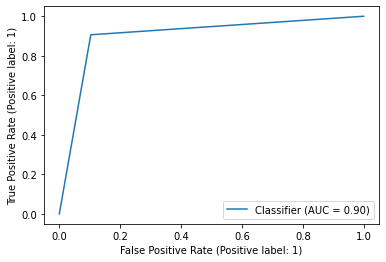

In [31]:
svc_poly = SVC(kernel='poly', C=0.4, degree=2, gamma='scale')
check_model(svc_poly, *get_train_test(df_path), roc=True)

In [32]:
svc_rbf = SVC(kernel="rbf", C=0.4, gamma='scale')
check_model(svc_rbf, *get_train_test(df_path))

		 train	| test
precision	 0.89 	| 0.93
recall		 0.9 	| 0.88
f1-score	 0.9 	| 0.9
accuracy	 0.88 	| 0.9


### 2. Logistic Regression Model

In [33]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="liblinear", penalty="l2", C=1.0)
check_model(log_reg, *get_train_test(df_path))

		 train	| test
precision	 0.87 	| 0.9
recall		 0.91 	| 0.88
f1-score	 0.89 	| 0.89
accuracy	 0.88 	| 0.89


### 3. Decision Tree & Random Forest

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt_cls = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_split=4)
check_model(dt_cls, *get_train_test(df_path))

		 train	| test
precision	 0.84 	| 0.85
recall		 0.96 	| 0.91
f1-score	 0.9 	| 0.88
accuracy	 0.88 	| 0.87


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier(
    random_state=42, max_depth=3, min_samples_split=4, 
    n_estimators=100, n_jobs=-1
    )
check_model(rf_cls, *get_train_test(df_path))

		 train	| test
precision	 0.85 	| 0.88
recall		 0.92 	| 0.91
f1-score	 0.88 	| 0.89
accuracy	 0.87 	| 0.89


In [36]:
# check feature importance in random forest
rf_feature_importance = pd.DataFrame(rf_cls.feature_importances_, index = X_test.columns)
rf_feature_importance[0].sort_values(ascending=False).head(5)

cat__thall_2     0.146694
cat__cp_0        0.127342
cat__caa_0       0.092234
num__oldpeak     0.087697
num__thalachh    0.082875
Name: 0, dtype: float64

### 4. AdaBoost & Gradient Descent

		 train	| test
precision	 0.84 	| 0.91
recall		 0.89 	| 0.91
f1-score	 0.86 	| 0.91
accuracy	 0.84 	| 0.9


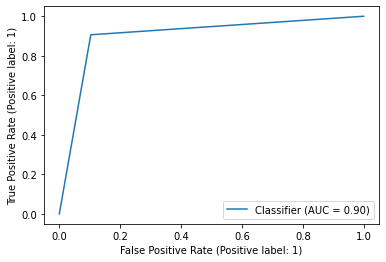

In [37]:
from sklearn.ensemble import AdaBoostClassifier

ada_cls = AdaBoostClassifier(random_state=42, n_estimators=100, learning_rate=0.01)
check_model(ada_cls, *get_train_test(df_path), roc=True)

In [38]:
# check feature importance in AdaBoost
ada_feature_importance = pd.DataFrame(ada_cls.feature_importances_, index = X_test.columns)
ada_feature_importance[0].sort_values(ascending=False).head(5)

cat__thall_2    0.32
cat__caa_0      0.29
cat__cp_0       0.21
num__oldpeak    0.08
cat__exng_0     0.07
Name: 0, dtype: float64

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

gb_cls = GradientBoostingClassifier(
    random_state=42, 
    loss="log_loss", 
    n_estimators=100, 
    max_depth=2, 
    min_samples_split=6, 
    max_features=0.5,
    learning_rate=0.01)
check_model(gb_cls, *get_train_test(df_path))

		 train	| test
precision	 0.85 	| 0.88
recall		 0.92 	| 0.91
f1-score	 0.88 	| 0.89
accuracy	 0.86 	| 0.89


In [47]:
# check feature importance in GradientBoosting
gb_feature_importance = pd.DataFrame(gb_cls.feature_importances_, index = X_test.columns)
gb_feature_importance[0].sort_values(ascending=False).head(5)

cat__thall_2    0.271316
cat__caa_0      0.241495
cat__cp_0       0.182523
num__oldpeak    0.118381
cat__exng_1     0.045679
Name: 0, dtype: float64